## Project Overview

### Husnuye Yasar

## Table of Contents
1. [Introduction](#1-Introduction)
2. [Data Exploration](#2-Data-Exploration)
3. [Outlier Investigation](#3-Outlier-Investigation)
4. [Create New Features](#4-Create-New-Features)
5. [Intelligently Select-Features](#5-Intelligently-Select-Features)
6. [Algorithm Selection and Tuning](#6-Algorithm-Selection-and-Tuning)
7. [Validate and Evaluate](#7-Validate-and-Evaluate)


## 1 Introduction

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives. 

In this project I will build a person of interest identifier based on financial and email data made public as a result of the Enron scandal. I use email and financial data for 146 executives at Enron to identify persons of interest in the fraud case.  A person of interest (POI) is someone who was indicted for fraud, settled with the government, or testified in exchange for immunity.  This report documents the machine learning techniques used in building a POI identifier.


In [2]:
from __future__ import division

import os
os.getcwd()
os.chdir(r'C:\Users\husnu\Desktop\udacity6\ud120ProjectMaster\FinalProject') # relative path: scripts dir is under Lab
os.getcwd()
    
from IPython.display import Image
import matplotlib.pyplot as plt
import sys
import pickle
from sklearn import preprocessing
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
sys.path.append("../tools/")

from collections import defaultdict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
# Change figure size into 8 by 6 inches
matplotlib.rcParams['figure.figsize'] = (8, 6)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from feature_format import featureFormat
from feature_format import targetFeatureSplit

### features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label
features_list = ["poi"]

### load the dictionary containing the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
df_enron=pd.DataFrame(data_dict)
enron=pd.DataFrame.transpose(df_enron)
#print df_enron

## 2 Data Exploration

Firstly let's look how data is structured.

In [4]:
print "There are ", len(enron.keys()), " executives in Enron Dataset."

There are  21  executives in Enron Dataset.


In [5]:
enron.shape

(146, 21)

In [6]:
enron.head(5)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [7]:
print "Number POI: " ,sum(enron["poi"])
print "Number POI: " ,len(enron["poi"])-sum(enron["poi"])

Number POI:  18
Number POI:  128


In [8]:
#print data_dict.keys()
print enron.keys()

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')


##  3 Outlier Investigation

First of all I’d like to have a look at my data and check it for outliers. I plot salaries and bonuses on Enron employees and see an outlier in the data.

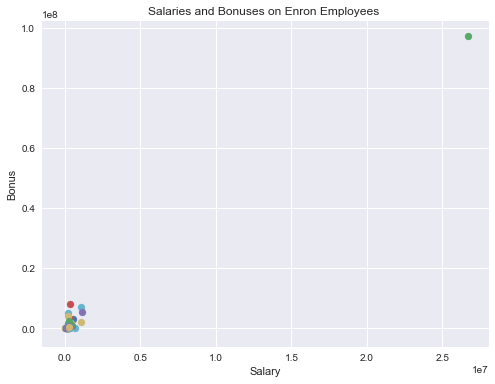

In [9]:

import matplotlib.pyplot as plt
import numpy as np
features = ["salary", "bonus"]
#data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)
### plot features
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title("Salaries and Bonuses on Enron Employees ")
plt.show()


Looking at the above scatterplot there is one combination of salary and bonus that is significantly higher than all the others which means it could be an outlier. To check what data points this could be let's print all executives with salary above \$1,000,000 and bonus above $5,000,000. Of our potential outliers, the first two are LAY KENNETH L and SKILLING JEFFREY K, the former chairman and CEO of Enron respectively, as well as persons of interest, so they will left in the dataset. However, the last potential outlier is TOTAL which represents the total salary and bonuses of every person in the dataset. Since this information will not help us create our POI identifier, I removed them from the dataset. The data without the outlier has been plotted below.


In [10]:
### remove any outliers before proceeding further
features = ["salary", "bonus"]
data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)

### remove NAN's from dataset
outliers = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key, int(val)))

outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=True))
### print top 4 salaries
print outliers_final
#[:6]

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932), ('PICKERING MARK R', 655037), ('WHALLEY LAWRENCE G', 510364), ('DERRICK JR. JAMES V', 492375), ('FASTOW ANDREW S', 440698), ('SHERRIFF JOHN R', 428780), ('RICE KENNETH D', 420636), ('CAUSEY RICHARD A', 415189), ('KEAN STEVEN J', 404338), ('HAEDICKE MARK E', 374125), ('MCMAHON JEFFREY', 370448), ('METTS MARK', 365788), ('DELAINEY DAVID W', 365163), ('MCCONNELL MICHAEL S', 365038), ('WALLS JR ROBERT H', 357091), ('MARTIN AMANDA K', 349487), ('LAVORATO JOHN J', 339288), ('BUY RICHARD B', 330546), ('OLSON CINDY K', 329078), ('WHITE JR THOMAS E', 317543), ('COX DAVID', 314288), ('KOENIG MARK E', 309946), ('FALLON JAMES B', 304588), ('SHANKMAN JEFFREY A', 304110), ('UMANOFF ADAM S', 288589), ('JACKSON CHARLENE R', 288558), ('COLWELL WESLEY', 288542), ('BOWEN JR RAYMOND M', 278601), ('DONAHUE JR JEFFREY M', 278601), ('KAMINSKI WINCENTY J', 275101), ('GLISAN JR BEN F', 274975), ('LEFF DANIEL P', 273746),

In [11]:

def enron_outliers(f1, f2, total = None):
    '''Plot features from dataframe and list potential outliers for bonus and salary.'''
    
    if total == 'remove':
        #remove 'TOTAL' from dictionary
        data_dict.pop('TOTAL', 0)

    #convert data_dict to pandas df
    df = pd.DataFrame.from_records(list(data_dict.values()))
    employees = pd.Series(list(data_dict.keys()))
    df.set_index(employees, inplace=True)
    new_features_list = df.columns.values
    
   
    print "Potential Outliers:"
    for employee in data_dict:
        if (data_dict[employee]['salary'] != 'NaN') and  \
                (data_dict[employee]['bonus'] != 'NaN'):
            if (data_dict[employee]['salary'] > 1000000) and (data_dict[employee]['bonus'] > 5000000):
                print(employee)

enron_outliers('salary', 'bonus')

Potential Outliers:
LAY KENNETH L
SKILLING JEFFREY K


Looking at the above scatterplot there is one combination of salary and bonus that is significantly higher than all the others which means it could be an outlier. To check what data points this could be let's print all executives with salary above $1,000,000 and bonus above $5,000,000. Of our potential outliers, the first two are LAY KENNETH L and SKILLING JEFFREY K, the former chairman and CEO of Enron respectively, as well as persons of interest, so they will left in the dataset. However, the last potential outlier is TOTAL which represents the total salary and bonuses of every person in the dataset. Since this information will not help us create our POI identifier, I removed them from the dataset. The data without the outlier has been plotted below.

In [12]:
enron_outliers('salary', 'bonus', total = 'remove')

Potential Outliers:
LAY KENNETH L
SKILLING JEFFREY K


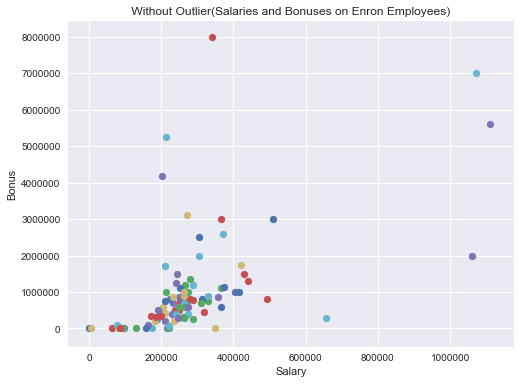

In [14]:
import numpy as np
features = ["salary", "bonus"]
#data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)
### plot features
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.title(" Without Outlier(Salaries and Bonuses on Enron Employees) ")
plt.show()

## 4 Create New Features

After cleaning the data from outliers I had to pick the most sensible features to use. First I picked 'from_poi_to_this_person' and  'from_this_person_to_poi' but there is was no strong pattern when I plotted the data so I used fractions for both features of “from/to poi messages” and “total from/to messages”. 


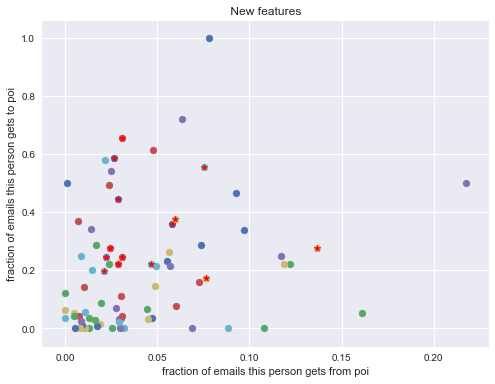

In [15]:
### create new features
### new features are: fraction_to_poi_email,fraction_from_poi_email

def dict_to_list(key,normalizer):
    new_list=[]

    for i in data_dict:
        if data_dict[i][key]=="NaN" or data_dict[i][normalizer]=="NaN":
            new_list.append(0.)
        elif data_dict[i][key]>=0:
            new_list.append(float(data_dict[i][key])/float(data_dict[i][normalizer]))
    return new_list

### create two lists of new features
fraction_from_poi_email=dict_to_list("from_poi_to_this_person","to_messages")
fraction_to_poi_email=dict_to_list("from_this_person_to_poi","from_messages")

### insert new features into data_dict
count=0
for i in data_dict:
    data_dict[i]["fraction_from_poi_email"]=fraction_from_poi_email[count]
    data_dict[i]["fraction_to_poi_email"]=fraction_to_poi_email[count]
    count +=1

    
features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email"]    
    ### store to my_dataset for easy export below
newdataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(newdataset, features_list)

### plot new features
for point in data:
    from_poi = point[1]
    to_poi = point[2]
    plt.scatter( from_poi, to_poi )
    if point[0] == 1:
        plt.scatter(from_poi, to_poi, color="r", marker="*")
plt.xlabel("fraction of emails this person gets from poi")
plt.ylabel("fraction of emails this person gets to poi")
plt.title(" New features ")
plt.show()

In order to find the most effective features for classification,The table, above, shows the score for each of the top 10 features identified using SelectKBest. 

## 5 Intelligently Select-Features

  Univariate or recursive feature selection is deployed, or features are selected by hand (different combinations of features are attempted, and the performance is documented for each one). Features that are selected are reported and the number of features selected is justified. For an algorithm that supports getting the feature importances (e.g. decision tree) or feature scores (e.g. SelectKBest), those are documented as well.

  Two different methods are attempted to select features: SelectKBest method and DecisionTree method. Both methods generate a score for the importance of each feature, and the results are listed below. The process of determing the optimal number of features is combined with the algorithm selection process in the next section.


In [16]:
def allFeaturesFormat(data_dict):
    '''Convert the data dictionary with all features to a pandas DataFrame.
    
    'NaN' is filled with 0.
    
    Arg:
    data_dict: A dictionry containing all features for the enron data
    
    return:
    df: A pandas DataFrame
    '''
    temp_list = []
    for name, features_values in data_dict.items():
        temp_dict = {}
        temp_dict['name'] = name
        for feature, value in features_values.items():
            if feature in ['poi', 'email_address']:
                temp_dict[feature] = value
            else:
                if value == 'NaN':
                    value = 0
                temp_dict[feature] = float(value)
        temp_list.append(temp_dict)
    df = pd.DataFrame(temp_list)
    return df

In [17]:
# Prepare features and labels for machine learning

df = allFeaturesFormat(data_dict)
# Subset dataframe with only numeric columns as features
features = df.drop(['poi', 'name', 'email_address'], axis=1)
#print features
# Labels are the 'poi' column
labels = df.poi
#print labels

In [17]:
# First Attempt Split #

# Split the whole dataset into stratified training/validation and test sets
# Training/validation set is used for building the model
# Test set is reserved for final model assessment

# Step 1:
# Split the whole dataset into training/validation set and test set
# features_train_validation, features_test, labels_train_validation, labels_test = \
#    train_test_split(features, labels, test_size=0.3, random_state=42, stratify=labels)
    
# Step 2: 
# Split the training/validation set further into training set and validation set using StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)

In [18]:
# Second Attempt Split #
# Split the whole data set into two sets
# They will be used as training set and validation set during model selection
# They will be used as training set and test set during model evaluation
sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=42)

In [19]:
def feature_scores(features, labels, cv, selector, score_attr):
    '''Calulate the average feature scores for each feature
    
    Arg:
    features: The features DataFrame
    labels: The labels array
    cv: A cross-validation scheme
    selector: Feature selection method
    score_attr: Name of the feature importance score for the givien feature selection method
    
    Return:
    feature_scores_avg: A dictionary containing the average feature scores for each feature
    '''
    feature_names = features.columns.values
    feature_scores = defaultdict(list)
    
    for train_indices, test_indices in cv.split(features, labels):
        
        features_train = features.values[train_indices]
        features_test = features.values[test_indices]
        labels_train = labels.values[train_indices]
        labels_test = labels.values[test_indices]

        slct = selector
        slct.fit(features_train, labels_train)
        
        for feature_name, feature_score in zip(feature_names, getattr(slct, score_attr)):
            feature_scores[feature_name].append(feature_score)
    
    feature_scores = pd.DataFrame(feature_scores)
    feature_scores_avg = feature_scores.mean()
    feature_scores_avg = feature_scores_avg.sort_values(ascending=False)
    return feature_scores_avg

In [20]:
# SelectKBest method
selector = SelectKBest(k='all')
feature_scores_avg = feature_scores(features, labels, sss, selector, 'scores_')
display(feature_scores_avg)
features_selectKBest_all = list(feature_scores_avg.index)

C:\Users\husnu\Anaconda2\anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [11] are constant.
  UserWarning)
C:\Users\husnu\Anaconda2\anaconda\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


exercised_stock_options      18.446172
total_stock_value            18.088838
bonus                        16.621550
salary                       13.937398
fraction_to_poi_email        12.935996
deferred_income               9.325264
long_term_incentive           8.611110
restricted_stock              7.664044
shared_receipt_with_poi       6.940215
total_payments                6.493621
loan_advances                 5.295081
expenses                      5.057068
from_poi_to_this_person       4.775045
other                         3.654096
fraction_from_poi_email       2.875730
from_this_person_to_poi       2.500868
to_messages                   1.799960
director_fees                 1.521759
deferral_payments             0.300142
restricted_stock_deferred     0.268495
from_messages                 0.225084
dtype: float64

In [21]:
# DecisionTree method
selector = DecisionTreeClassifier()
feature_scores_avg = feature_scores(features, labels, sss, selector, 'feature_importances_')
display(feature_scores_avg)
features_decicionTree_all = list(feature_scores_avg.index)


fraction_to_poi_email        0.153519
exercised_stock_options      0.118765
expenses                     0.107589
bonus                        0.105194
other                        0.086718
shared_receipt_with_poi      0.071784
total_stock_value            0.062706
deferred_income              0.057896
total_payments               0.034573
restricted_stock             0.032990
long_term_incentive          0.031782
salary                       0.026077
from_poi_to_this_person      0.025038
from_messages                0.023189
from_this_person_to_poi      0.022120
fraction_from_poi_email      0.016712
to_messages                  0.011959
deferral_payments            0.008962
restricted_stock_deferred    0.001738
loan_advances                0.000645
director_fees                0.000044
dtype: float64

##  6 Algorithm Selection and Tuning

 Three algorithms are attempted: Naive Bayes, AdaBoost, Random Forest.NaiveBayes_SelectKBest,AdaBoost_SelectKBest,RandomForest_SelectKBest,NaiveBayes_DecisionTree,AdaBoost_DecisionTree,
RandomForest_DecisionTree. For each algorithm, evaluation metrics: accuracy, precision, recall and f1 score are calculated for varying number of features from SelectKBest and DecisionTree methods.

The rationale behind combining feature selection and algorithm picking is due to lack of definite cutoff threshold for number of features to keep. Therefore, I decide to calculate metrics for each algorithm with different number of features by included features starting from the highest score feature to the lowest. And the combination of algorithm and number of features that gives the highest f1 score will be my final model candidate.

## Accuracy, Precision, Recall & F1 Score


### True Positives (TP)
- These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

### True Negatives (TN) 

 - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

### False Positives (FP)
    – When actual class is no and predicted class is yes. E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

### False Negatives (FN) 
   – When actual class is yes but predicted class in no. E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

Once you understand these four parameters then we can calculate Accuracy, Precision, Recall and F1 score.

### Accuracy
  - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

### Accuracy = TP+TN/TP+FP+FN+TN

### Precision
- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

### Precision = TP/TP+FP

### Recall (Sensitivity) 
  - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

### Recall = TP/TP+FN

### F1 score 

- F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

### F1 Score = 2*(Recall * Precision) / (Recall + Precision)


In [24]:
 

def metrics_scores(features_n, labels, cv, clf):
    '''Calculate accuracy, precision, recall, f1 score and f2 score for a given model
    
    Args:
    features_n: A subset of features DataFrame containing n features
    labels: The labels array
    cv: A cross-validation scheme
    clf: A classifier method
    
    Return:
    (accuracy, precision, recall, f1, f2): A tuple containing evaluation metric scores
    '''
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0

    for train_indices, test_indices in cv.split(features_n, labels):

        features_train = features_n.values[train_indices]
        features_test = features_n.values[test_indices]
        labels_train = labels.values[train_indices]
        labels_test = labels.values[test_indices]

        clf.fit(features_train, labels_train)
        labels_pred = clf.predict(features_test)

        for prediction, truth in zip(labels_pred, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1

                 
    total_predictions = true_negatives+false_negatives+false_positives+true_positives
    accuracy = (true_positives+true_negatives)/total_predictions
    precision = true_positives/(true_positives+false_positives)
    recall = true_positives/(true_positives+false_negatives)
    f1 = 2*true_positives/(2*true_positives+false_positives+false_negatives)   
    f2 = (1+2*2)*precision*recall/(4*precision+recall)

    return (accuracy, precision, recall, f1, f2)
    #return (accuracy, precision, recall, f1, f2)

def feature_num_scores(features, labels, feature_names_by_score, cv, clf):
    '''Calculate and plot evaluation metrics vs number of features for a given model
    
    Arg:
    features: The features DataFrame
    labels: The labels array
    feature_names_by_score: Feature names in descending order of feature importance scores
    cv: A cross-validation scheme
    clf: A classifier method
    
    Return:
    scores_df: A DataFrame containing evaluation metrics vs number of features
    '''
    num_features_accuracy_scores = []
    num_features_percision_scores = []
    num_features_recall_scores = []
    num_features_f1_scores = []
    
    for n in range(len(feature_names_by_score)):
        
        # Subset n features with the n highest feature scores
        features_n = features[feature_names_by_score[:n+1]]
        
        accuracy, precision, recall, f1, _ = metrics_scores(features_n, labels, cv, clf)
        
        num_features_accuracy_scores.append(accuracy)
        num_features_percision_scores.append(precision)
        num_features_recall_scores.append(recall)
        num_features_f1_scores.append(f1)
        
    scores_df = pd.DataFrame({
            'Number of features': range(1, len(num_features_accuracy_scores)+1),
            'Accuracy': num_features_accuracy_scores,
            'Precision': num_features_percision_scores,
            'Recall': num_features_recall_scores,
            'f1': num_features_f1_scores
        })
    
    scores_df.plot(x='Number of features', xticks=range(1, len(num_features_accuracy_scores)+1))
    return scores_df

In [25]:
# Due to running time, 100 shuffles are used instead of 1000 shuffles for algorithm selection
sss_100 = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=42)

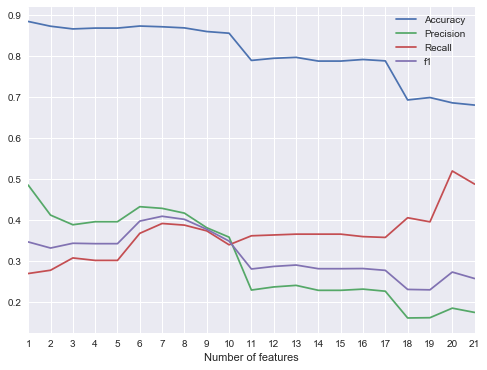

In [26]:
# Naive Bayes with SelectKBest features
clf = GaussianNB()
scores_NaiveBayes_SelectKBest_df = feature_num_scores(features, labels, features_selectKBest_all, sss_100, clf)

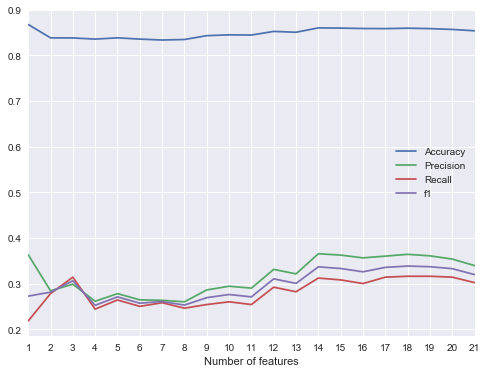

In [28]:
# AdaBoost with SelectKBest features
clf = AdaBoostClassifier()
scores_AdaBoost_SelectKBest_df = feature_num_scores(features, labels, features_selectKBest_all, sss_100, clf)

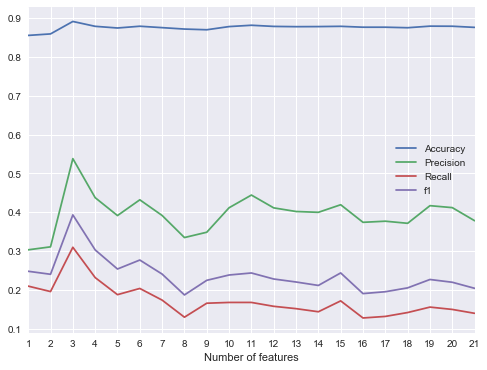

In [29]:
# Random Forest with SelectKBest features
clf = RandomForestClassifier()
scores_RandomForest_SelectKBest_df = feature_num_scores(features, labels, features_selectKBest_all, sss_100, clf)

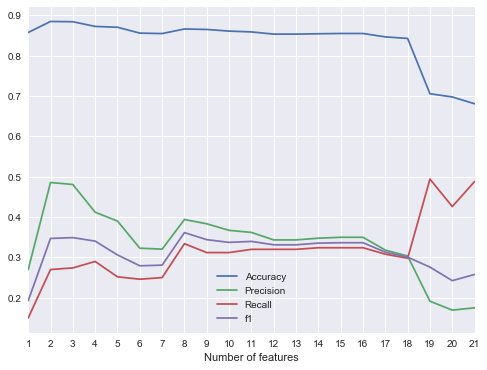

In [30]:
# Naive Bayes with DecisionTree features
clf = GaussianNB()
scores_NaiveBayes_DecisionTree_df = feature_num_scores(features, labels, features_decicionTree_all, sss_100, clf)

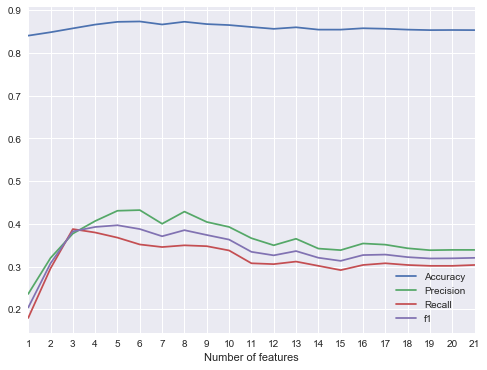

In [31]:
# AdaBoost with DecisionTree features
clf = AdaBoostClassifier()
scores_AdaBoost_DecisionTree_df = feature_num_scores(features, labels, features_decicionTree_all, sss_100, clf)

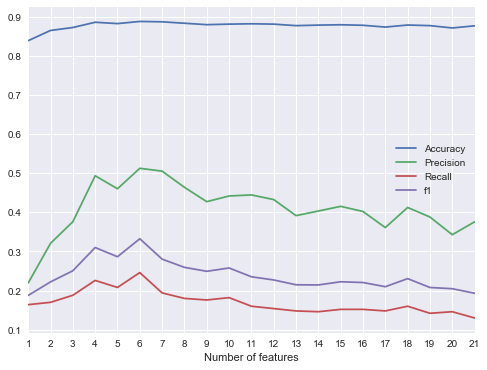

In [32]:
# Random Forest with decisionTree features
clf = RandomForestClassifier()
scores_RandomForest_DecisionTree_df = feature_num_scores(features, labels, features_decicionTree_all, sss_100, clf)

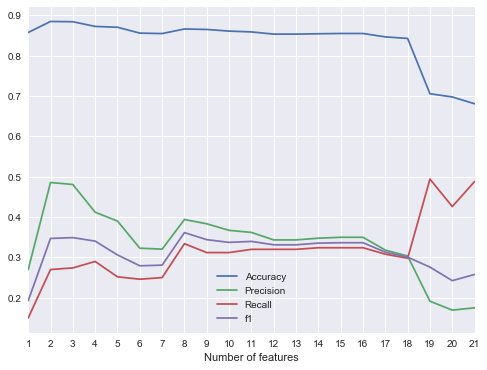

In [33]:
# Naive Bayes with DecisionTree features
clf = GaussianNB()
scores_NaiveBayes_DecisionTree_df = feature_num_scores(features, labels, features_decicionTree_all, sss_100, clf)

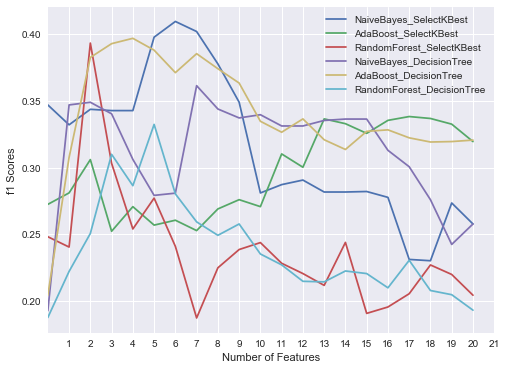

In [34]:
# Plot f1 scores of all previous 6 combinations of classifier methods and feature selection methods
f1_df = pd.DataFrame([scores_NaiveBayes_SelectKBest_df['f1'], 
                     scores_AdaBoost_SelectKBest_df['f1'],
                     scores_RandomForest_SelectKBest_df['f1'],
                     scores_NaiveBayes_DecisionTree_df['f1'],
                     scores_AdaBoost_DecisionTree_df['f1'],
                     scores_RandomForest_DecisionTree_df['f1']]).T
f1_df.columns = ['NaiveBayes_SelectKBest',
                'AdaBoost_SelectKBest',
                'RandomForest_SelectKBest',
                'NaiveBayes_DecisionTree',
                'AdaBoost_DecisionTree',
                'RandomForest_DecisionTree']
ax = f1_df.plot(xticks=arange(1, f1_df.shape[0]+1))
ax.set_xlabel('Number of Features')
ax.set_ylabel('f1 Scores')

Out of the  algorithms tested without tuning, NaiveBayes_SelectKBest with 6 features selected using SelectKBest  because it gives the best f1 score.

In [35]:
features_DecisionTree_6 = features_selectKBest_all[:6]
display("Features selected for  NaiveBayes_SelectKBest:", features_DecisionTree_6)

'Features selected for  NaiveBayes_SelectKBest:'

['exercised_stock_options',
 'total_stock_value',
 'bonus',
 'salary',
 'fraction_to_poi_email',
 'deferred_income']

In [36]:
def display_metrics(accuracy, precision, recall, f1, f2):
    '''Display metrics scores
    
    Arg:
    accuracy: Accuracy score
    precision: Precision Score
    recall: Recall score
    f1: f1 score
    f2: f2 score
    '''
    
    PERF_FORMAT_STRING = "\
    Accuracy: {:>0.{display_precision}f}\n\
    Precision: {:>0.{display_precision}f}\n\
    Recall: {:>0.{display_precision}f}\n\
    F1: {:>0.{display_precision}f}\n"

    print(PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, display_precision = 6))

In [37]:
clf = GaussianNB()
scores = metrics_scores(features[features_DecisionTree_6], labels, sss, clf)
display_metrics(*scores)

    Accuracy: 0.874591
    Precision: 0.440922
    Recall: 0.386600
    F1: 0.411978



##  7 Validate and Evaluate


  Validation plays an important role when checking the performance of the data. If the data use to fit the model, is also used to make the prediction, the model will be unable to predict on new data and overfit.<br/>
  The simplest way to prevent it, is to divide the dataset into a training and testing set, but limit the number of observations use to train the model.<br/>
  A better method called cross-validation could be used where the dataset is divide in k fold and a subset of the data is used to train the data, and the the rest is used to predict then repeat the process by changing the subset of data used to train the model.<br/>
  In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.<br/>
  To evaluate the performance of the model, the average performance of the model on each round is taken.<br/>


In [39]:

### features_list is a list of strings each of which is a feature name
###Features selected for  NaiveBayes_SelectKBest, 
###first feature must be "poi", as this will be singled out as the label
features_list =['poi','exercised_stock_options','total_stock_value','bonus','salary','fraction_to_poi_email','deferred_income']
### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)


### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)


### machine learning goes here!
### please name your classifier clf for easy export below

### deploying feature selection
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

### use KFold for split and validate algorithm
from sklearn.cross_validation import KFold
kf=KFold(len(labels),5)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]

#from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = GaussianNB()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print 'accuracy before tuning ', score

print " Gaussian Naive Bayes algorithm time:", round(time()-t0, 3), "s"


### use manual tuning parameter min_samples_split
t0 = time()
clf = GaussianNB()
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_test, pred)

print "Validating algorithm:"
print "accuracy after tuning = ", acc

# function for calculation ratio of true positives
# out of all positives (true + false)
print 'precision = ', precision_score(labels_test,pred,average='weighted')

# function for calculation ratio of true positives
# out of true positives and false negatives
#'macro'
print 'recall = ', recall_score(labels_test,pred, average='weighted')
#print(classification_report(y, y_pred))

### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(data_dict, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )


# For this project where I had to identify the person of interest, some preprocessing had to be done to handle some ouliers and bad data.Then I had to pick a classifier, best suited for this problem.Gaussian Naives bayes gives result just slightly above 0.3.Decision Tree give a good result after tuning some parameters. I choose Decision tree as the final model because of the performance of the rapidity of execution.
# The precision can be interpreted as the likelihood that a person who is identified as a POI is actually a true POI; the fact that this is 0.85 means that using this identifier to flag POI’s would result in 15% of the positive flags being false alarms. Recall measures how likely it is that identifier will flag a POI in the test set. 66% of the time it would catch that person, and 34% of the time it wouldn’t.  
# These numbers are quite good but we still can improve the strategy. One of the possible paths to improvement is digging in to the emails data more. The email features in the starter dataset were aggregated over all the messages for a given person. By digging into the text of each individual’s messages, it’s possible that more detailed patterns (say, messages to/from a specific address, rather than just messages to/from any POI address, or the usage of specific vocabulary terms) might emerge.  Since we live in a world in which more POI finance data might not be easy to find, the next realistic thing to try might be to extract more data from the emails. 

accuracy before tuning  0.75
 Gaussian Naive Bayes algorithm time: 0.004 s
done in 0.008s
Validating algorithm:
accuracy after tuning =  0.75
precision =  0.768939393939
recall =  0.75


 For this project where I had to identify the person of interest, some preprocessing had to be done to handle some ouliers and bad data.Then I had to pick a classifier, best suited for this problem.Univariate or recursive feature selection is deployed. For an algorithm that supports getting the feature importances (e.g. decision tree) or feature scores (e.g. SelectKBest).I used NaiveBayes_SelectKBest, AdaBoost_SelectKBest,RandomForest_SelectKBest,NaiveBayes_DecisionTree, AdaBoost_DecisionTree, RandomForest_DecisionTree. For each algorithm, evaluation metrics: accuracy, precision, recall and f1 score are calculated for varying number of features from SelectKBest and DecisionTree methods.Out of the algorithms tested without tuning, NaiveBayes_SelectKBest with 6 features selected.it gives the best f1 score.I used It in  k-fold cross-validation to evaluate predictive models .
 The precision can be interpreted as the likelihood that a person who is identified as a POI is actually a true POI; the fact that this is 0.76 means that using this identifier to flag POI’s would result in 24% of the positive flags being false alarms. Recall measures how likely it is that identifier will flag a POI in the test set. 75% of the time it would catch that person, and 25% of the time it wouldn’t.  
  These numbers are quite good but we still can improve the strategy. One of the possible paths to improvement is digging in to the emails data more. The email features in the starter dataset were aggregated over all the messages for a given person. By digging into the text of each individual’s messages, it’s possible that more detailed patterns (say, messages to/from a specific address, rather than just messages to/from any POI address, or the usage of specific vocabulary terms) might emerge.  Since we live in a world in which more POI finance data might not be easy to find, the next realistic thing to try might be to extract more data from the emails. 
